In [28]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus as dot
from IPython.display import SVG
from projet_madi import *
import numpy as np
from maxproduct import *

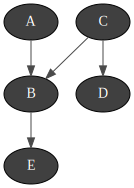

[0.5584089070759812, 0.6533688141400874]

In [29]:
%reload_ext autoreload
%autoreload 2
bn=gum.fastBN("A->B<-C->D->E<-B")
bn.eraseArc("D","E")
gnb.showBN(bn)
gnb.showPotential(bn.cpt("B"))
[max(bn.cpt("B")[{"B":0}].flatten()),max(bn.cpt("B")[{"B":1}].flatten())]

In [30]:
%reload_ext autoreload
%autoreload 2
for i in bn.nodes():
    print("variable {} : {}".format(i,bn.variable(i)))
print()
for i in bn.nodes():
    print("cpt {} : {}".format(i,bn.cpt(i)))

variable 0 : A[0,1]
variable 1 : B[0,1]
variable 2 : C[0,1]
variable 3 : D[0,1]
variable 4 : E[0,1]

cpt 0 : <A:0> :: 0.433398 /<A:1> :: 0.566602
cpt 1 : <B:0|A:0|C:0> :: 0.558409 /<B:1|A:0|C:0> :: 0.441591 /<B:0|A:1|C:0> :: 0.346631 /<B:1|A:1|C:0> :: 0.653369 /<B:0|A:0|C:1> :: 0.479452 /<B:1|A:0|C:1> :: 0.520548 /<B:0|A:1|C:1> :: 0.521914 /<B:1|A:1|C:1> :: 0.478086
cpt 2 : <C:0> :: 0.399743 /<C:1> :: 0.600257
cpt 3 : <D:0|C:0> :: 0.467958 /<D:1|C:0> :: 0.532042 /<D:0|C:1> :: 0.334256 /<D:1|C:1> :: 0.665744
cpt 4 : <E:0|B:0> :: 0.865733 /<E:1|B:0> :: 0.134267 /<E:0|B:1> :: 0.962909 /<E:1|B:1> :: 0.0370912


In [31]:
bn.cpt(3)
#cpt = gum.Potential(bn.cpt(3));
#cpt.fillWith(0);
#cpt[0] = 1;
#gnb.showPotential(cpt)



(gum::Potential<double>@0x55fa489dc220) <D:0|C:0> :: 0.467958 /<D:1|C:0> :: 0.532042 /<D:0|C:1> :: 0.334256 /<D:1|C:1> :: 0.665744

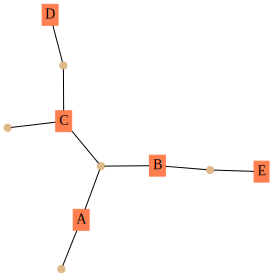

In [32]:
bn=gum.fastBN("A->B<-C->D->E<-B")
bn.eraseArc("D","E")
gf = FactorGraph();
gf.build(bn);
g=dot.graph_from_dot_data(gf.show())
SVG(g.create_svg())

In [33]:
#import pyAgrum as gum
#import pyAgrum.lib.notebook as gnb

#a,b,c=[gum.LabelizedVariable(s,s,2) for s in "abc"]
#p1=gum.Potential().add(a).add(b).fillWith([1,2,3,4]).normalize()
#p2=gum.Potential().add(b).add(c).fillWith([4,5,2,3]).normalize()

#gnb.sideBySide(p1,p2,p1+p2,
#              captions=['p1','p2','p1+p2'])

In [34]:
%reload_ext autoreload
%autoreload 2
print("Exo:")
spi=TreeSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))
#spi.posterior("A")          # retourne la distribution de 'A' sous la forme d'un `gum.Potential`

# pour comparer
print("Inference dans PyAgrum:")
ie=gum.LazyPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))



Exo:


Inference dans PyAgrum:



\
\
LBPSumProductInference   ADDEvidence TEST

In [35]:

# pour comparer
print("Inference dans PyAgrum:")
ie=gum.LazyPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
gnb.showPotential(ie.posterior(4))

Inference dans PyAgrum:


graph


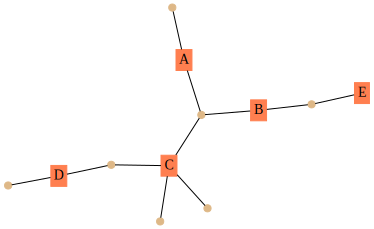

In [36]:
spi=TreeSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})

spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(4))
print("graph")
g=dot.graph_from_dot_data(spi.fg.show())
SVG(g.create_svg())



\ 
\
\
\
LBPSumProductInference  TEST

In [37]:
# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.makeInference()
gnb.showPotential(ie.posterior(3))

Inference LBP dans PyAgrum:


In [38]:
%reload_ext autoreload
%autoreload 2

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))

Exo LBPSumproductInference:


\
\
\
LBP  TEST

In [39]:
# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
gnb.showPotential(ie.posterior(4))

Inference LBP dans PyAgrum:


In [40]:
%reload_ext autoreload
%autoreload 2

print("Exo LBPSumproductInference:")
spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(4))


Exo LBPSumproductInference:


\ 
\
\
\
TreeMaxProduct

In [41]:
%reload_ext autoreload
%autoreload 2

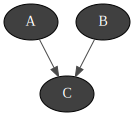

In [49]:
bn=gum.fastBN("A->C<-B");
gnb.showBN(bn)
bn.cpt("A").fillWith([0,1]);
bn.cpt("B").fillWith([0,1]);
bn.cpt("C").fillWith([0.2384,0.7616,0.7420,0.2580,0.5474,0.4526,0.1668,0.8332])
gnb.sideBySide(bn.cpt("A"),bn.cpt("B"),bn.cpt("C"),
              captions=['A','B','C'])

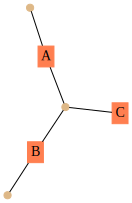

In [57]:
gf = FactorGraph();
gf.build(bn);
g=dot.graph_from_dot_data(spi.fg.show())
SVG(g.create_svg())

In [ ]:
%reload_ext autoreload
%autoreload 2
print("TreeMax");
spi=TreeMaxProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))

In [60]:

%reload_ext autoreload
%autoreload 2
print("TreeMax");
spi=TreeMaxProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
gnb.showPotential(spi.posterior(3))

TreeMax
node 0 envoie un message de type **<class 'list'>** au node_factor 4
node 2 envoie un message de type **<class 'list'>** au node_factor 4
type of message  <class 'pyAgrum.pyAgrum.Potential'> type of dictdict <class 'list'>
node_factor 4 envoie un message de type **<class 'pyAgrum.pyAgrum.Potential'>** au node_variable 0


TypeError: can't multiply sequence by non-int of type 'Potential'